In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from urllib.parse import urlparse
from googlesearch import search
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('phishing_site_urls.csv')

In [3]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [10]:
def abnormal_url(url):
    hostname=urlparse(url).hostname
    hostname=str(hostname)
    match=re.search(hostname,url)
    if match:
        return 1
    else:
        return 0

In [11]:
df['abnormal_url']=df['URL'].apply(lambda x:abnormal_url(x))

In [17]:
df.head(3)

,URL,Label,count_dot,count_w,count_atrate,abnormal_url,google_index
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,6,0,0,0,1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,5,1,0,0,1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,7,0,0,0,1


In [13]:
def count_dot(url):
    count_dot=url.count('.')
    return count_dot
df['count_dot']=df['URL'].apply(lambda x:count_dot(x))

In [14]:
def count_w(url):
    count_w=url.count('www')
    return count_w
df['count_w']=df['URL'].apply(lambda x:count_w(x))

In [15]:
def count_atrate(url):
    return url.count('@')
df['count_atrate']=df['URL'].apply(lambda x:count_atrate(x))

In [16]:
def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['URL'].apply(lambda x: google_index(x))

In [18]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['URL'].apply(lambda x: no_of_dir(x))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domian'] = df['URL'].apply(lambda x: no_of_embed(x))

In [19]:
def count_https(url):
    return url.count('https')

df['count-https'] = df['URL'].apply(lambda x : count_https(x))

def count_http(url):
    return url.count('http')

df['count-http'] = df['URL'].apply(lambda x : count_http(x))

In [20]:
def url_length(url):
    return len(str(url))
df['url_length'] = df['URL'].apply(lambda x: url_length(x))


def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['URL'].apply(lambda x: hostname_length(x))


In [21]:
df.head(2)

,URL,Label,count_dot,count_w,count_atrate,abnormal_url,google_index,count_dir,count_embed_domian,count-https,count-http,url_length,hostname_length
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,6,0,0,0,1,8,0,0,0,225,0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,5,1,0,0,1,4,0,0,0,81,0


In [22]:
df['google_index'].value_counts()

1    549346
Name: google_index, dtype: int64

In [23]:
from urllib.parse import urlparse
from tld import get_tld
import os.path

def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['URL'].apply(lambda x: fd_length(x))


df['tld'] = df['URL'].apply(lambda x: get_tld(x,fail_silently=True))


def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda x: tld_length(x))

In [24]:
df=df.drop(columns=['URL','google_index'])

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['type']=encoder.fit_transform(df['Label'])#converting label to numeric form

In [29]:
df=df.drop(columns=['tld'])

In [30]:
df.head(2)

,Label,count_dot,count_w,count_atrate,abnormal_url,count_dir,count_embed_domian,count-https,count-http,url_length,hostname_length,fd_length,tld_length,type
0,bad,6,0,0,0,8,0,0,0,225,0,35,-1,0
1,bad,5,1,0,0,4,0,0,0,81,0,12,-1,0


In [31]:
df=df.drop(columns=['Label'])

In [32]:
x=df.drop(columns=['type'])
y=df['type']

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=x.columns
x=scaler.fit_transform(x)
x=pd.DataFrame(x,columns=X)

In [34]:
x.head()

,count_dot,count_w,count_atrate,abnormal_url,count_dir,count_embed_domian,count-https,count-http,url_length,hostname_length,fd_length,tld_length
0,2.599770,-0.329612,-0.056935,-0.01636,3.708457,-0.03723,-0.040322,-0.076683,3.923264,-0.014064,2.619927,-0.014401
1,1.939541,2.871047,-0.056935,-0.01636,1.065812,-0.03723,-0.040322,-0.076683,0.681338,-0.014064,0.369957,-0.014401
2,3.259998,-0.329612,-0.056935,-0.01636,5.690442,-0.03723,-0.040322,-0.076683,2.842622,-0.014064,6.630744,-0.014401
3,2.599770,2.871047,-0.056935,-0.01636,-0.255511,-0.03723,-0.040322,-0.076683,0.208557,-0.014064,2.130803,-0.014401
4,-0.701371,-0.329612,-0.056935,-0.01636,3.047796,-0.03723,-0.040322,-0.076683,1.469306,-0.014064,0.174307,-0.014401


In [35]:
y.head(2)

0    0
1    0
Name: type, dtype: int32

In [36]:
x.columns

Index(['count_dot', 'count_w', 'count_atrate', 'abnormal_url', 'count_dir',
       'count_embed_domian', 'count-https', 'count-http', 'url_length',
       'hostname_length', 'fd_length', 'tld_length'],
      dtype='object')

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

In [38]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=400)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=400)

In [39]:
model.score(x_train,y_train)

0.8688119487753597

In [40]:
pred=model.predict(x_test)

In [35]:
accuracy_score(y_test,pred)

0.7904796577773733

In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.62      0.69     31270
           1       0.86      0.93      0.90     78600

    accuracy                           0.84    109870
   macro avg       0.82      0.78      0.79    109870
weighted avg       0.84      0.84      0.84    109870



<AxesSubplot:>

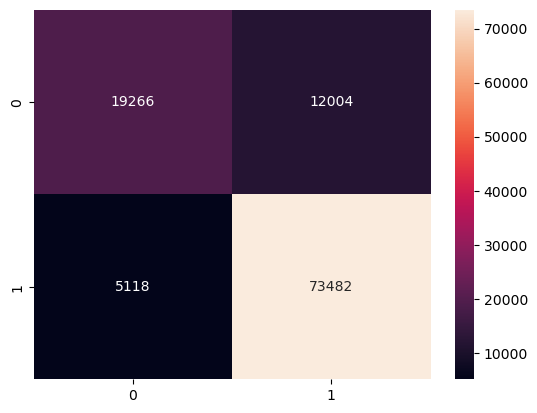

In [43]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [53]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [54]:
model.score(x_train,y_train)

0.7564326607141232

In [56]:
pred=model.predict(x_test)
pred[:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
accuracy_score(y_test,pred)

0.7568854100300355

In [50]:

def main(url):
    
    lists = []
    lists.append(abnormal_url(url))
    lists.append(count_dot(url))
    lists.append(count_w(url))
    lists.append(count_atrate(url))
    lists.append(no_of_dir(url))
    lists.append(no_of_embed(url))
    lists.append(count_https(url))
    lists.append(count_http(url))
    lists.append(url_length(url))
    lists.append(hostname_length(url))
    lists.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)
    lists.append(tld_length(tld))
    
    
    return lists

In [62]:
def new_prediction(test_url):
    features_test=main(test_url)
    features_test = np.array(features_test).reshape((1, -1))
    predict=model.predict(features_test)
    if predict[0]==0:
        result='Phisihng site detected'
        return result
    else:
        result='Safe site'
        return result

In [63]:
urls=['https://tld.readthedocs.io/en/0.4/','www.google.com']
for i in urls:
    print(new_prediction(i))

Phisihng site detected
Phisihng site detected


C:\Users\meghn\Desktop\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\meghn\Desktop\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
